# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [8]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

Формат файла WAV - это формат для хранения оцифрованных аудиосигналов. 
Параметры дискретизации и квантования указаны в заголовке .wav файла.

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [12]:
import IPython.display

filename='D:/Учеба ВШЭ/Мои работы/1 модуль/Цифровая обработка сигналов/Лабораторные работы/ЛР_1/voice.wav'
IPython.display.Audio(filename)

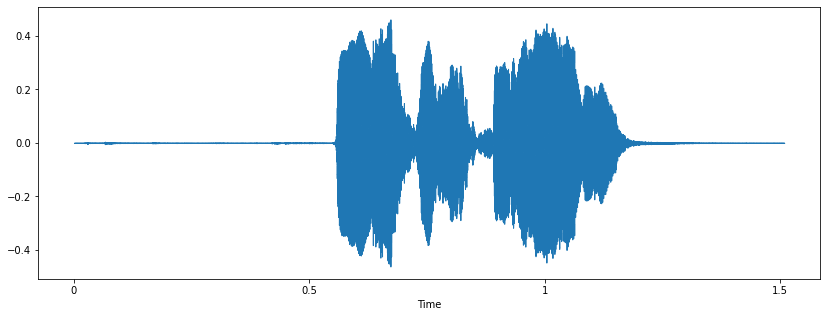

In [13]:
import librosa.display

glass_break_data, fs1 = librosa.load(filename)
x = glass_break_data.astype('float')

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=48000)

In [14]:
import librosa   
import soundfile as sf

filename_1 = 'D:/Учеба ВШЭ/Мои работы/1 модуль/Цифровая обработка сигналов/Лабораторные работы/ЛР_1/voice_new.wav'

glass_break_data_1, fs1_1 = librosa.load(filename, sr=600) 
sf.write(filename_1, glass_break_data_1, fs1_1)

new_data, s = librosa.load(filename_1, sr=48000)
sf.write(filename_1, new_data, s)

IPython.display.Audio(filename_1, rate=48000)


При частоте дискритизации 600 Гц невозможно разобрать речь.

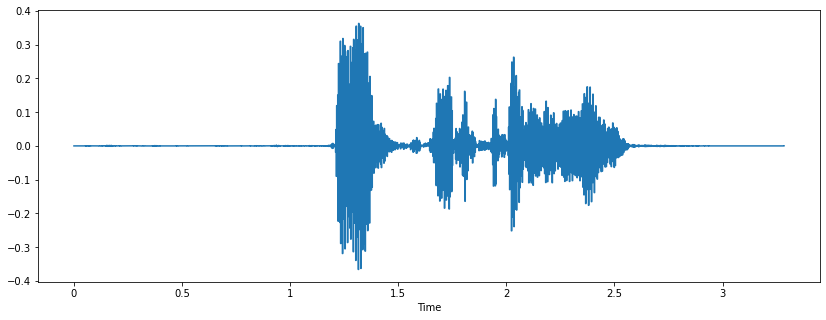

In [15]:
import librosa.display

x_1 = glass_break_data_1.astype('float')

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x_1, sr=fs1_1)

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

Основное отличие .wav от других кодеков в том, что в нем хранится звук без сжатия. Это влияет на качество звука и на размер итогового файла: в .wav будет хорошее качество звука, но при этом и вес файла будет больше, по сравнению с другими кодеками.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [16]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [17]:
# Читаем данные с подготовленными сигналами
import pickle
file = 'D:/Учеба ВШЭ/Мои работы/1 модуль/Цифровая обработка сигналов/Лабораторные работы/ЛР_1/data.pickle'
with open(file, "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

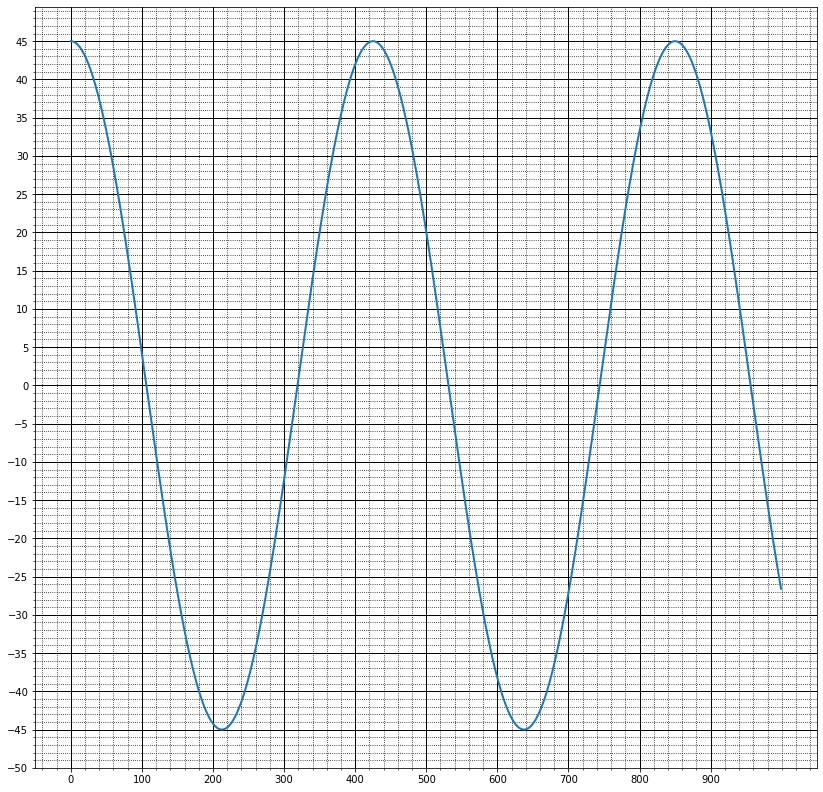

In [18]:
draw_signal(test_data['task2']['a'])

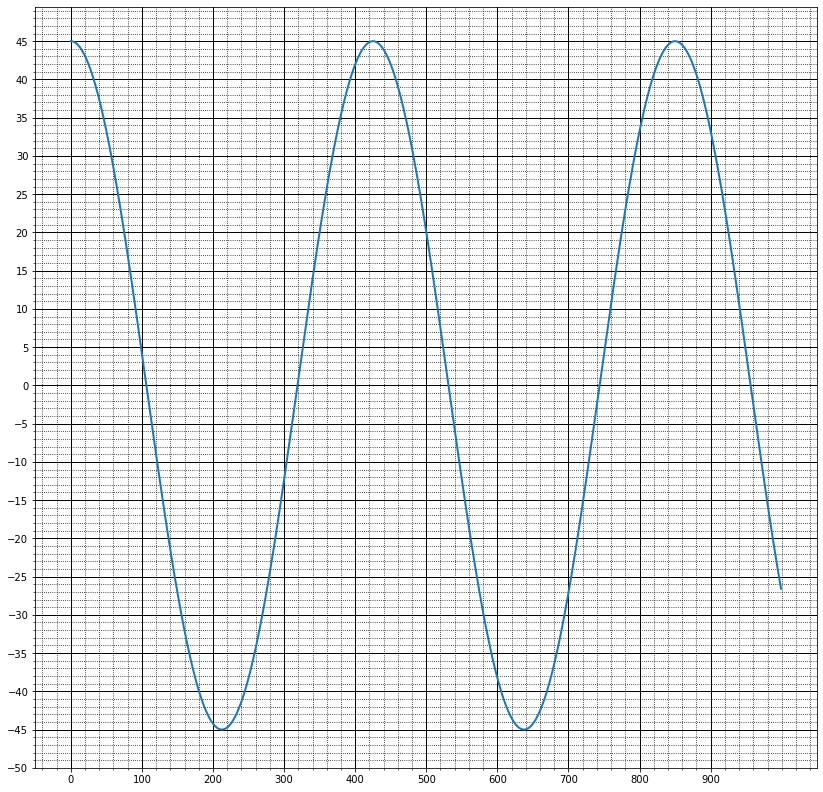

In [19]:
t = np.arange(1000)
a = 45 * np.cos(2 * np.pi / 425 * t + 0)
draw_signal(a)

In [20]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{425}$

3. Фаза - $\phi= 0$

### Сигнал ***b***

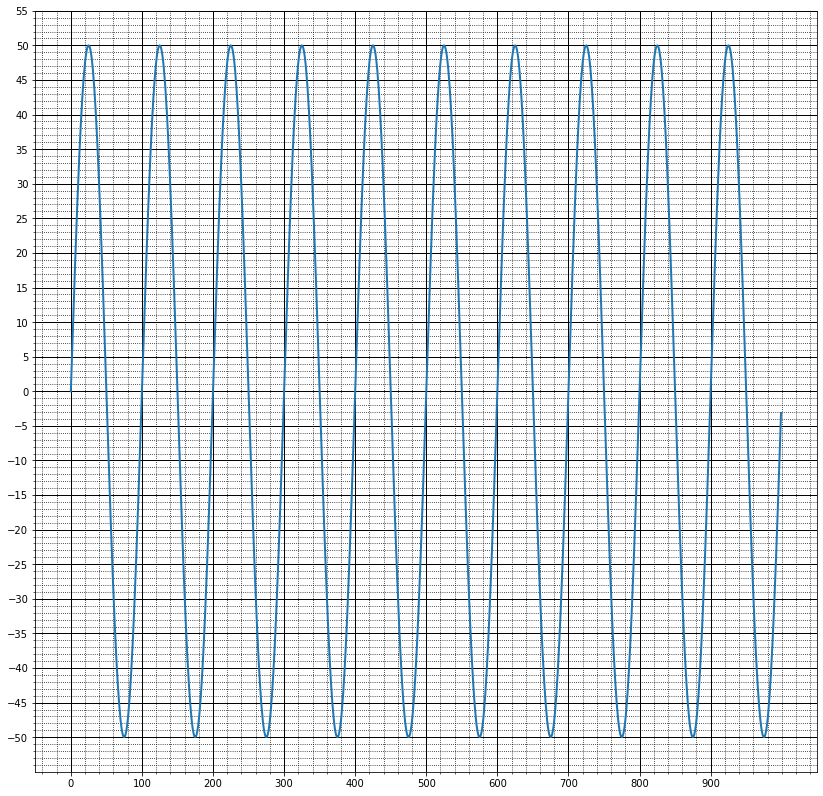

In [21]:
draw_signal(test_data['task2']['b'])

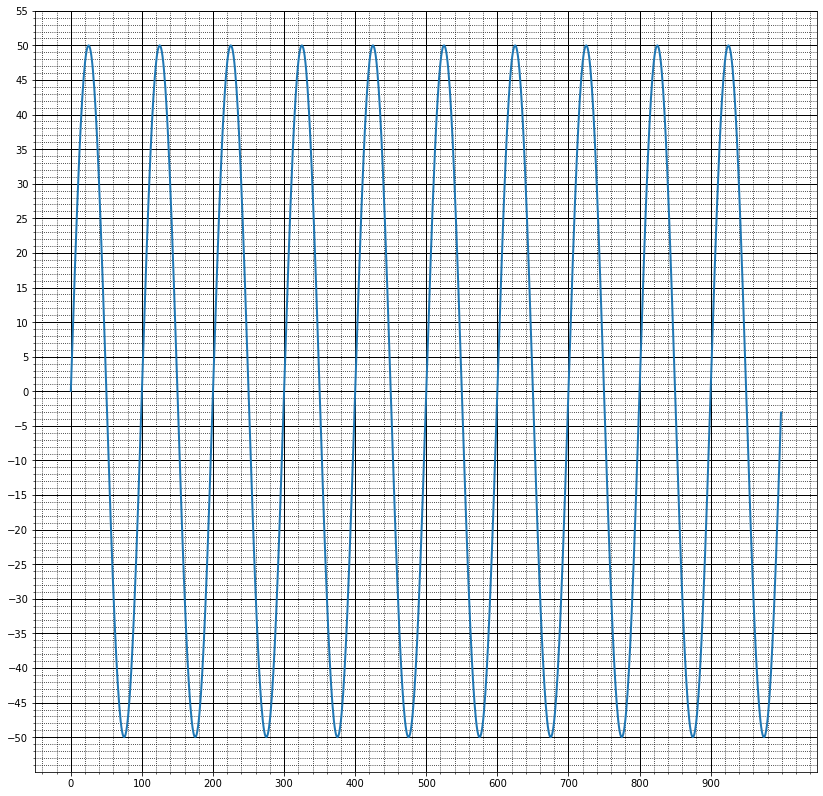

In [22]:
t = np.arange(1000)
b = 50 * np.cos(2 * np.pi / 100 * t + 17.28)
draw_signal(b)

In [23]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{100}$

3. Фаза - $\phi= 17.28$

### Сигнал ***c***

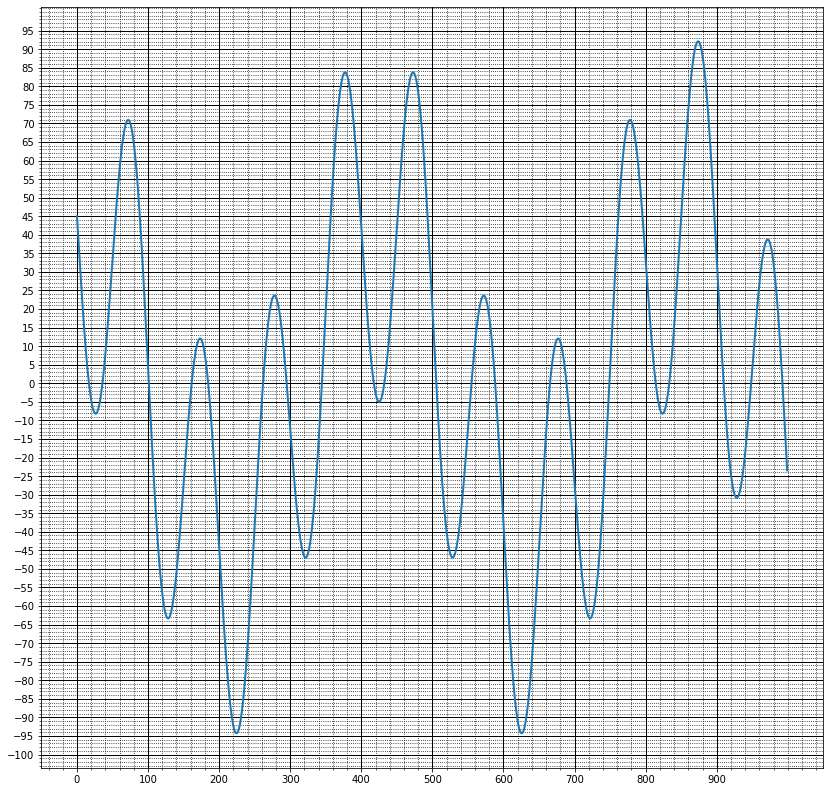

In [24]:
draw_signal(test_data['task2']['c'])

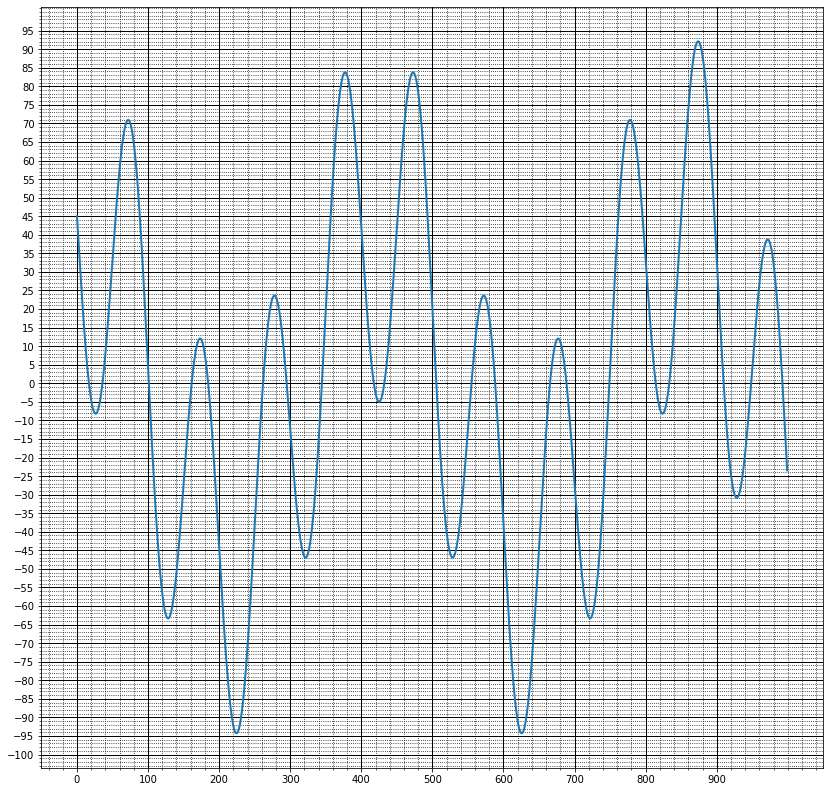

In [25]:
# сигнал состоит из двух гармоник
t = np.arange(1000) 
c = 45 * np.cos(2 * np.pi / 425 * t) + 50 * np.sin(2 * np.pi / 100 * t + np.pi)
draw_signal(c)

In [505]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [26]:
def convolve(a, b):
    m, n = len(a), len(b)
    z = []
    for k in range(m + n):
        c = 0
        if max(1, k + 1 - n) - 1 == min(k, m):
            continue
        for j in range(max(1, k + 1 - n)-1, min(k, m)):
            c += a[j] * b[k - j - 1]
        z.append(c)
    return z 

In [27]:
import scipy

def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [28]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [29]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

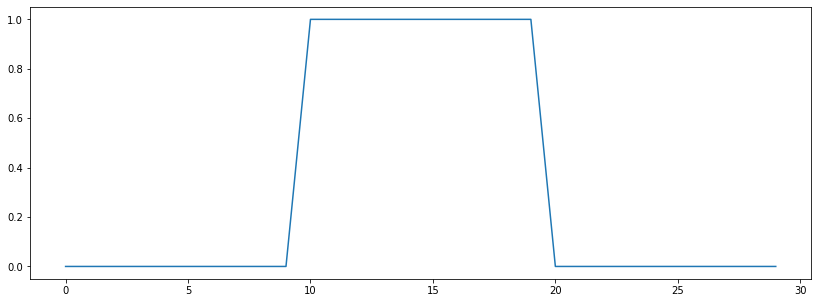

In [30]:
plt.figure(figsize=(14, 5))
plt.plot(a)
plt.show()

Сигнал **b**

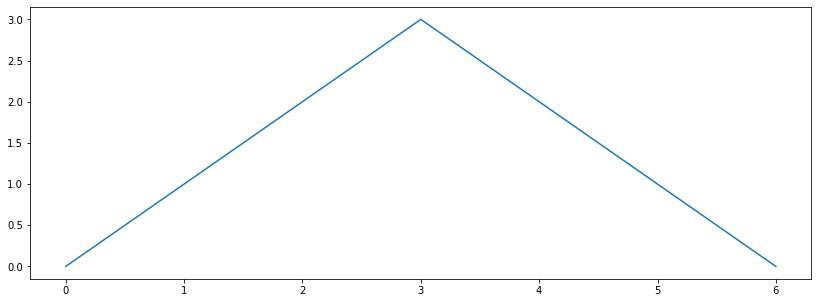

In [31]:
plt.figure(figsize=(14, 5))
plt.plot(b)
plt.show()

Свертка **a** и **b**

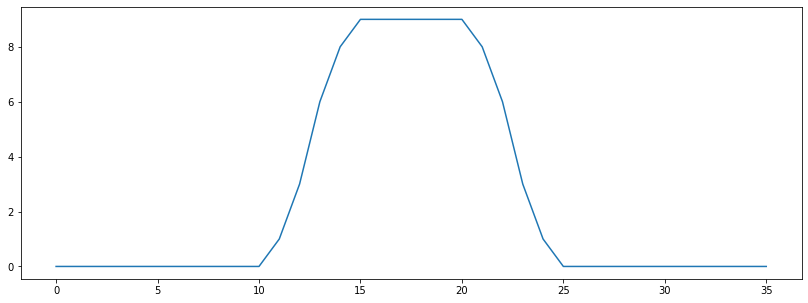

In [32]:
plt.figure(figsize=(14, 5))
plt.plot(convolve(a, b))
plt.show()

Все 3 графика на одной картинке:

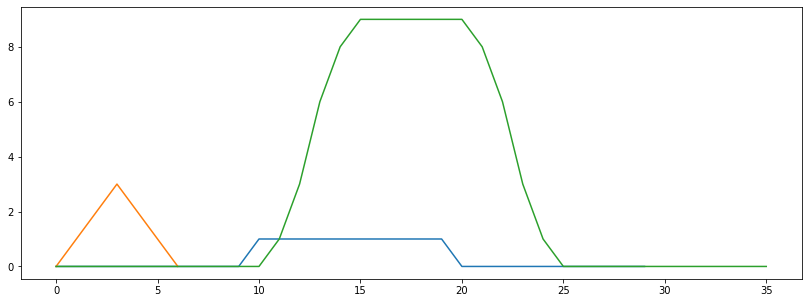

In [33]:
plt.figure(figsize=(14, 5))
plt.plot(a)
plt.plot(b)
plt.plot(convolve(a, b))
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [34]:
def karplus_strong(noise, gen_len):
    samples = np.zeros(int(gen_len))
    for i in range(len(noise)):
        samples[i] = noise[i]
    for i in range(len(noise), len(samples)):
        samples[i] = (samples[i - len(noise)] + samples[i - len(noise) - 1]) / 2
        
    return samples

In [35]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [38]:
import scipy.io.wavfile as wave

sample_rate_1 = 44100 
frequency_1 = 82.41
sec_1 = 2
gen_len_1 = sample_rate_1 * sec_1
noise_1 = (2 * np.random.uniform(-1, 1, int(sample_rate_1/frequency_1)))

gen_wav_1 = karplus_strong(noise_1, gen_len_1) 
samples_1 = gen_wav_1 / np.max(np.abs(gen_wav_1))
sound_1 = np.int16(samples_1 * 32767)

guitar_1 = 'D:/Учеба ВШЭ/Мои работы/1 модуль/Цифровая обработка сигналов/Лабораторные работы/ЛР_1/guitar_1.wav'
wave.write(guitar_1, sample_rate_1, sound_1)
IPython.display.Audio(guitar_1, rate=sample_rate_1)

Визуализируем затухание амплитуды:

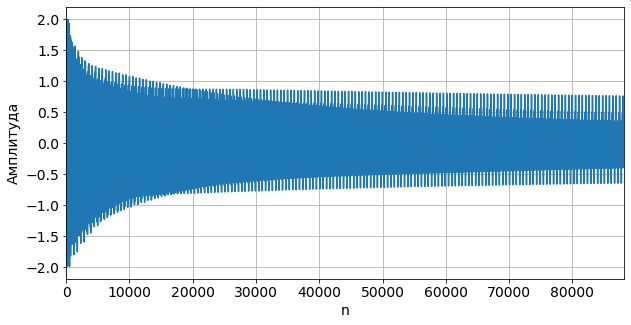

In [39]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len_1)
plt.plot(np.linspace(0, gen_len_1 + 1, gen_len_1), gen_wav_1)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

In [40]:
sample_rate_2 = 42000 
frequency_2 = 423
sec_2 = 2
gen_len_2 = sample_rate_2 * sec_2
noise_2 = (2 * np.random.uniform(-1, 1, int(sample_rate_2/frequency_2)))

gen_wav_2 = karplus_strong(noise_2, gen_len_2) 
samples_2 = gen_wav_2 / np.max(np.abs(gen_wav_2))
sound_2 = np.int16(samples_2 * 32767)

guitar_2 = 'D:/Учеба ВШЭ/Мои работы/1 модуль/Цифровая обработка сигналов/Лабораторные работы/ЛР_1/guitar_2.wav'
wave.write(guitar_2, sample_rate_2, sound_2)
IPython.display.Audio(guitar_2, rate=sample_rate_2)

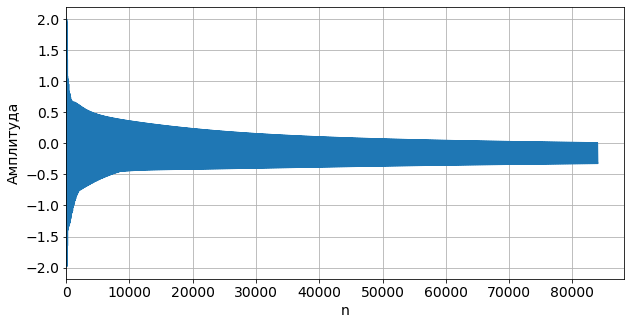

In [41]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len_2 + 1, gen_len_2), gen_wav_2)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

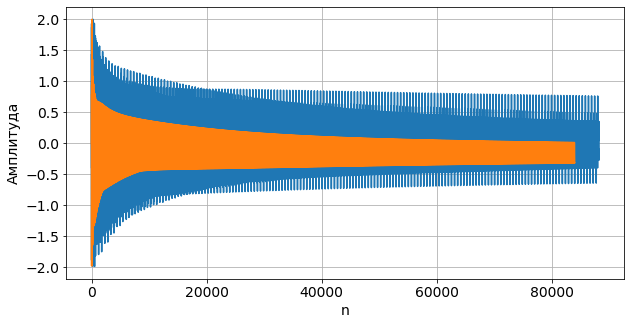

In [45]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.plot(np.linspace(0, gen_len_1 + 1, gen_len_1), gen_wav_1)
plt.plot(np.linspace(0, gen_len_2 + 1, gen_len_2), gen_wav_2)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()